# Dataset Description
Data ini adalah dataset mengenai prediksi analisis kemungkinan seseorang mengalami serangan Jantung. Data ini diambil dari data Kaggle dengan source code https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Description
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
1. Value 1: typical angina
2. Value 2: atypical angina
3. Value 3: non-anginal pain
4. Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
1. Value 0: normal
2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Import Package and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Perbandingan Data Output Heart Deases')

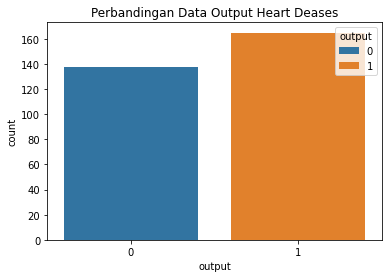

In [6]:
sns.countplot(data['output'],hue=data['output'],dodge=False)
plt.title('Perbandingan Data Output Heart Deases')

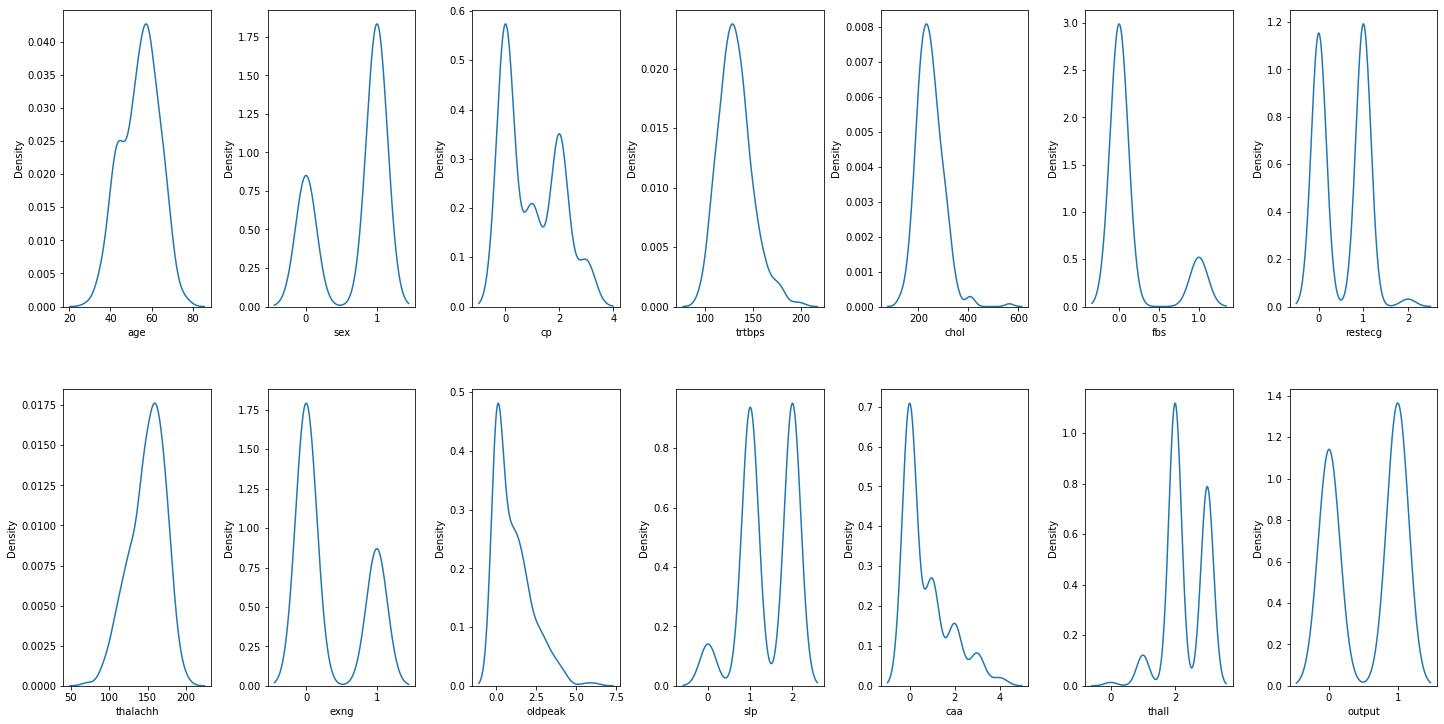

In [7]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.kdeplot(x=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

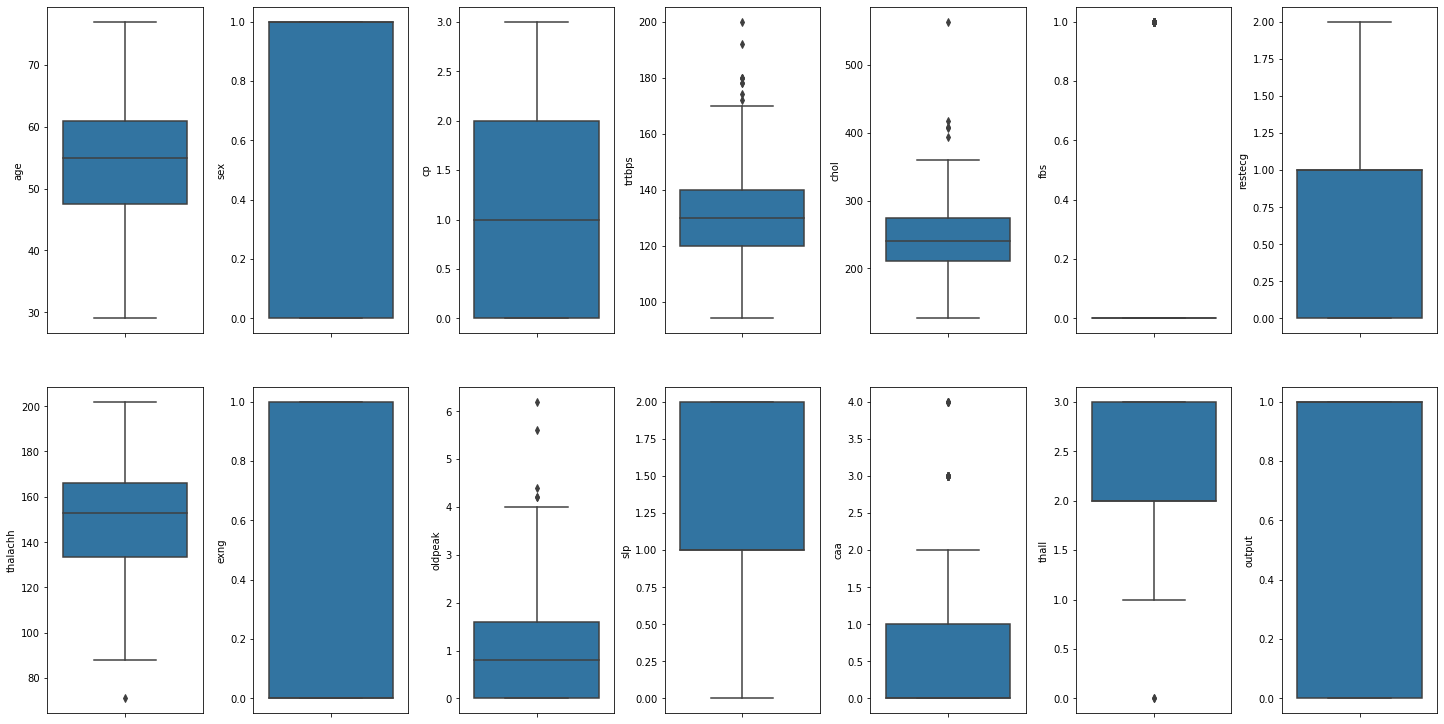

In [8]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

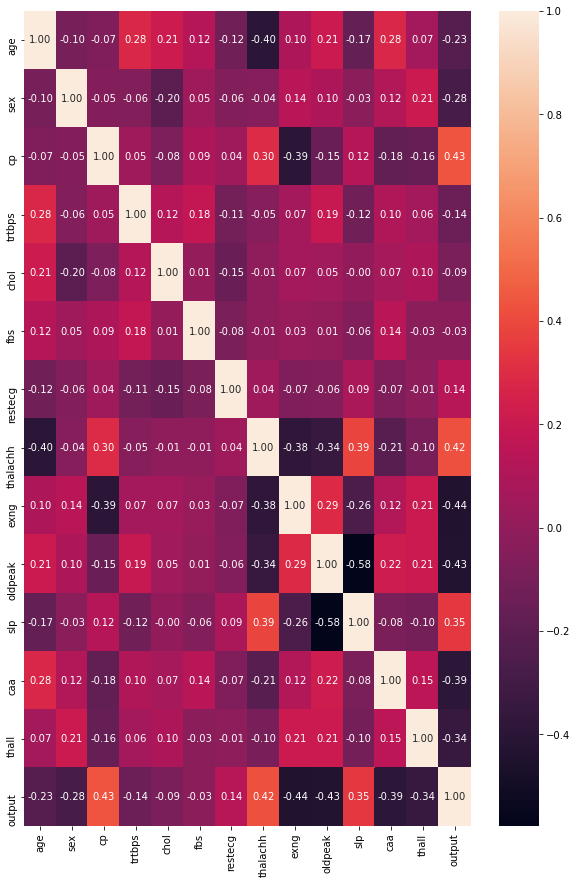

In [9]:
plt.figure(figsize=(10,15))
sns.heatmap(data.corr(),fmt='.2f', annot=True)

In [10]:
data.columns.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

# Machine Learning Basic Model

In [11]:
X = data.drop('output', axis=1)
y = data['output']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model_basic_knn = KNeighborsClassifier(n_neighbors=5)
model_basic_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred_basic_knn = model_basic_knn.predict(X_test)
y_pred_basic_knn

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [15]:
model_basic_knn.score(X_test, y_test)

0.6885245901639344

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_basic_knn))
print(confusion_matrix(y_test, y_pred_basic_knn))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

[[18 11]
 [ 8 24]]


## Model 2: SVM Classifier

In [17]:
from sklearn.svm import SVC
model_basic_svc = SVC()
model_basic_svc.fit(X_train, y_train)

SVC()

In [18]:
y_pred_basic_svm = model_basic_svc.predict(X_test)
y_pred_basic_svm

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [19]:
model_basic_svc.score(X_test, y_test)

0.7049180327868853

In [20]:
print(classification_report(y_test, y_pred_basic_svm))
print(confusion_matrix(y_test, y_pred_basic_svm))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61

[[15 14]
 [ 4 28]]


# Model 3: Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_basic_rf = RandomForestClassifier()
model_basic_rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred_basic_rf = model_basic_rf.predict(X_test)
y_pred_basic_rf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [23]:
model_basic_rf.score(X_test, y_test)

0.8360655737704918

In [24]:
print(classification_report(y_test, y_pred_basic_rf))
print(confusion_matrix(y_test, y_pred_basic_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[24  5]
 [ 5 27]]


## Model 4: Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier
model_basic_nn = MLPClassifier()
model_basic_nn.fit(X_train, y_train)

MLPClassifier()

In [26]:
y_pred_basic_nn = model_basic_nn.predict(X_test)
y_pred_basic_nn

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [27]:
model_basic_nn.score(X_test, y_test)

0.7540983606557377

In [28]:
print(classification_report(y_test, y_pred_basic_nn))
print(confusion_matrix(y_test, y_pred_basic_nn))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.87      0.62      0.73        32

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

[[26  3]
 [12 20]]


# Tuning via Preprocessing & Feature Selection

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [31]:
steps = [
    ('minmax_scaler', MinMaxScaler()),
    ('standar_scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=4)),
    ('model', RandomForestClassifier())
]

In [32]:
model_pipe = Pipeline(steps)
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('standar_scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_classif at 0x7f951ae31ee0>)),
                ('model', RandomForestClassifier())])

In [33]:
y_pred_pipe = model_pipe.predict(X_test)
y_pred_pipe

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [34]:
model_pipe.score(X_test, y_test)

0.819672131147541

In [35]:
print(classification_report(y_test, y_pred_pipe))
print(confusion_matrix(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[23  6]
 [ 5 27]]


Setelah melakukan percobaan 5 model basic dan 1 model menggunakan preprocessing dan feature selection, Maka model terbaik dalam menggambarkan kondisi Heart Deases seseorang adalah model basic Random Forest Classifier dengan tingkat Akurasi 83% dengan Precison sebesar 83% dan Recall sebesar 83%

Hasil ini masih bisa ditingkatkan dengan beberapa cara, antara lain menambah dataset yang ada, melakukan hyperparameter tuning, melakukan EDA lebih baik, maupun melakukan preprocessing yang lebih sesuai